In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns

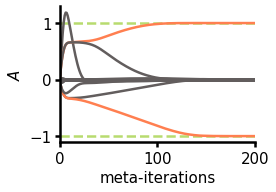

In [3]:
!pwd

/groups/funke/home/mehtay/research/MetaLearnPlasticity/playground


In [42]:
data = pd.read_csv("/groups/funke/home/mehtay/research/MetaLearnPlasticity/explogs/A_exps.csv")

In [43]:
data.head()

,Unnamed: 0,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,...,num_trajec,len_trajec,type,upto_ith_order,num_meta_params,l1_lmbda,sparsity,noise_scale,device,jobid
0,0,0.000088,-0.000130,0.000199,0.000005,-0.000057,0.000026,0.000021,0.000115,0.0,...,250,50,activity,3,17,0.0,0.8,0.2,cpu,1
1,1,-0.000304,-0.060136,0.001639,-0.000378,-0.060035,0.001444,-0.000355,-0.059814,0.0,...,250,50,activity,3,17,0.0,0.8,0.2,cpu,1
2,2,-0.000921,-0.093966,0.003321,-0.000966,-0.093832,0.003104,-0.000914,-0.093569,0.0,...,250,50,activity,3,17,0.0,0.8,0.2,cpu,1
3,3,-0.001240,-0.115697,0.004943,-0.001250,-0.115556,0.004704,-0.001164,-0.115282,0.0,...,250,50,activity,3,17,0.0,0.8,0.2,cpu,1
4,4,-0.001453,-0.129465,0.007629,-0.001425,-0.129344,0.007375,-0.001300,-0.129087,0.0,...,250,50,activity,3,17,0.0,0.8,0.2,cpu,1


In [16]:
data.noise_scale[399]

0.0

In [44]:
A = ['A_' + str(i) + str(j) + str(k) for i in range (3) for j in range(3) for k in range(3)]

In [45]:
data['input_dim'].unique()

array([ 50, 200])

In [46]:
data['sparsity'].unique()

array([0.8, 0.9, 1. ])

In [9]:
data['meta_epochs'].unique()

array([200])

In [49]:
df = data.loc[(data['epoch'] <= 200) & (data['jobid'] == 0)  & (data['noise_scale'] == 0) & (data['sparsity'] == 1), A]
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,A_122,A_200,A_201,A_202,A_210,A_211,A_212,A_220,A_221,A_222
1600,-1.621036e-04,-0.000046,-0.000210,-0.000164,-0.000016,0.000155,0.000077,0.000214,0.0,0.000112,...,0.0,0.000232,0.000058,-0.0,-0.000071,-0.0,0.0,-0.0,-0.0,0.0
1601,2.158471e-04,-0.082825,-0.003588,0.000193,-0.082501,-0.003306,0.000413,-0.081973,0.0,0.162264,...,0.0,0.000695,-0.076029,-0.0,0.000381,-0.0,0.0,-0.0,-0.0,0.0
1602,5.459107e-05,-0.119997,-0.000487,0.000028,-0.119533,-0.000312,0.000243,-0.118875,0.0,0.240072,...,0.0,0.000838,-0.103964,-0.0,0.000523,-0.0,0.0,-0.0,-0.0,0.0
1603,7.990193e-06,-0.135607,0.001193,-0.000021,-0.135362,0.001313,0.000192,-0.134927,0.0,0.271505,...,0.0,0.000655,-0.110440,-0.0,0.000341,-0.0,0.0,-0.0,-0.0,0.0
1604,-3.975739e-06,-0.140306,0.000927,-0.000034,-0.140556,0.001040,0.000179,-0.140615,0.0,0.281086,...,0.0,0.000353,-0.105934,-0.0,0.000041,-0.0,0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,-8.627565e-07,0.078849,0.001224,-0.000058,-0.311797,-0.002389,0.000140,-0.692062,0.0,0.152544,...,0.0,-0.000665,0.000075,-0.0,0.001189,-0.0,0.0,-0.0,-0.0,0.0
1796,-4.580154e-05,0.078924,0.001187,0.000019,-0.311863,-0.002260,0.000338,-0.692272,0.0,0.152338,...,0.0,-0.000646,-0.000232,-0.0,0.001304,-0.0,0.0,-0.0,-0.0,0.0
1797,-1.554828e-04,0.079117,0.001677,0.000019,-0.311784,-0.001653,0.000454,-0.692316,0.0,0.152404,...,0.0,-0.000721,-0.002395,-0.0,0.001317,-0.0,0.0,-0.0,-0.0,0.0
1798,-1.025542e-04,0.079010,0.001140,0.000014,-0.311865,-0.002225,0.000390,-0.692380,0.0,0.152414,...,0.0,-0.000667,-0.001300,-0.0,0.001310,-0.0,0.0,-0.0,-0.0,0.0


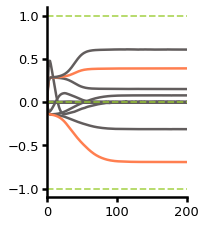

In [50]:
fontsize = 13
font = 'Arial'
linewidth = 2.5
n_meta_it = 200

fig, ax = plt.subplots(figsize=(2.5, 3.5))
plt.axhline(y=1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)
plt.axhline(y=-1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)

for i in range(3):
    for j in range(3):
        for k in range(3):    
            col = '#625D5D'
            if i == 1 and j == 1 and k == 0:
                # col = '#4863A0'
                col = 'coral'
            elif i == 0 and j == 2 and k == 1:
                # col = '#fdb462'
                col = 'coral'
            ax.plot([i for i in range(200)], df['A_'+str(i)+str(j)+str(k)],color = col, linewidth = linewidth)
            
# ax.set_ylabel(r'$A$', fontname="arial", fontsize=fontsize , labelpad = 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)_
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.tick_params(width=linewidth, labelsize=fontsize, length=2*linewidth)
ax.set_xticks([0,int(n_meta_it/2), n_meta_it])
# ax.set_xlabel('meta-iterations', fontsize=fontsize, fontname="arial")
ax.set_xlim([0,n_meta_it])
for tick in ax.get_yticklabels():
    tick.set_fontname(font)
for tick in ax.get_xticklabels():
    tick.set_fontname(font)

plt.axhline(y=0, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)
    
plt.savefig('A_noisy.png', dpi=500, bbox_inches="tight")

In [53]:
df = data.loc[(data['output_dim'] == 50) & (data['input_dim'] == 889) & (data['epoch'] <= 200) & (data['jobid'] == 4), A]

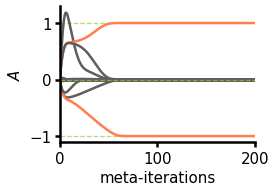

In [54]:
fontsize = 15
font = 'Arial'
linewidth = 2.5
n_meta_it = 200

fig, ax = plt.subplots(figsize=(3.5, 2.5))
plt.axhline(y=1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.5, alpha=0.7)
plt.axhline(y=-1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.5, alpha=0.7)

for i in range(3):
    for j in range(3):
        for k in range(3):    
            col = '#625D5D'
            if i == 1 and j == 1 and k == 0:
                # col = '#4863A0'
                col = 'coral'
            elif i == 0 and j == 2 and k == 1:
                # col = '#fdb462'
                col = 'coral'
            ax.plot([i for i in range(201)], df['A_'+str(i)+str(j)+str(k)],color = col, linewidth = linewidth)
            
ax.set_ylabel(r'$A$', fontname="arial", fontsize=fontsize , labelpad = 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.tick_params(width=linewidth, labelsize=fontsize, length=2*linewidth)
ax.set_xticks([0,int(n_meta_it/2), n_meta_it])
ax.set_xlabel('meta-iterations', fontsize=fontsize, fontname="arial")
ax.set_xlim([0,n_meta_it])
for tick in ax.get_yticklabels():
    tick.set_fontname(font)
for tick in ax.get_xticklabels():
    tick.set_fontname(font)

plt.axhline(y=0, color='yellowgreen', linestyle='--', linewidth=linewidth*0.5, alpha=0.7)
    
# plt.savefig('As.png', dpi=500)

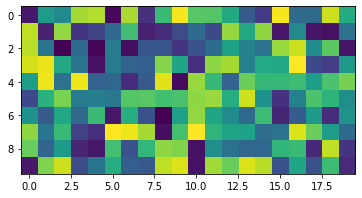

In [3]:
plt.imshow(img)

In [85]:
def func():
    return np.ones(4)

In [90]:
b = np.zeros(4)
for i in range(2):
    a = func()
    b = np.vstack((b,a))

In [91]:
np.delete(b, 0, 0)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [51]:
with open('losses_mat.npy', 'rb') as f:
    img = np.load(f)

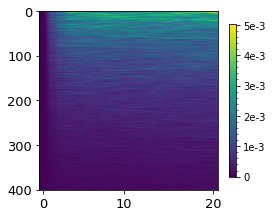

In [62]:
fig, ax = plt.subplots(figsize=(4, 4))
pos = ax.imshow(img[:400], aspect=0.05)
plt.xticks(ticks=[0, 9, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')
plt.yticks(ticks=[0, 99, 199, 299, 399], labels=[0, 100, 200, 300, 400], fontsize=13, fontname='Arial')
# ax.xaxis.tick_top()
# cbar = fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=0.7, ticks=[0.5, 1])
cbar = fig.colorbar(pos, ax=ax, shrink=0.7, ticks=[0, 0.001, 0.002, 0.003, 0.004, 0.005])
cbar.ax.set_yticklabels(['0', '1e-3', '2e-3', '3e-3', '4e-3', '5e-3'])
cbar.minorticks_on()

plt.savefig('rastor.png', dpi=600)

In [86]:
data = pd.read_csv("/groups/funke/home/mehtay/research/MetaLearnPlasticity/explogs/sparse-noise.csv")

<ipython-input-86-58dd940b3bed>:1: DtypeWarning: Columns (0,6,10,11,12,16,17,18,20,26,29,35,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/groups/funke/home/mehtay/research/MetaLearnPlasticity/explogs/sparse-noise.csv")


In [110]:
rastor = np.zeros((6,6))
# rastor = [[[] for i in range(6)] for j in range(6)]

for i, noise in enumerate([0, 0.2, 0.4, 0.6, 0.8, 1]):
    for j, sparsity in enumerate([1, 0.9, 0.8, 0.7, 0.6, 0.5]):
        df = data.loc[(data['noise_scale'] == noise) & (data['sparsity'] == sparsity) & (data['epoch'] == 49), ['r2_score']]
        rastor[i][j] = np.maximum(np.array(df['r2_score']), 0).mean()
        # rastor[i][j] = np.array(df['r2_score']).mean()

In [111]:
rastor

array([[0.99962639, 0.97711018, 0.93462957, 0.88188567, 0.81235327,
        0.72736427],
       [0.94904205, 0.93324638, 0.90355145, 0.85981547, 0.78620615,
        0.67936617],
       [0.89550619, 0.88392532, 0.84495554, 0.79603622, 0.69632132,
        0.58284836],
       [0.83057679, 0.80865413, 0.7625102 , 0.71326738, 0.59908908,
        0.50378499],
       [0.76373003, 0.72225621, 0.67907272, 0.61166046, 0.48731733,
        0.403663  ],
       [0.69945521, 0.63981612, 0.57129184, 0.49450874, 0.37598998,
        0.30465663]])

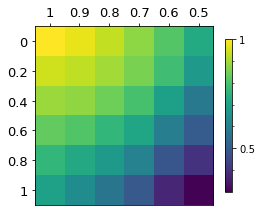

In [137]:
fig, ax = plt.subplots(figsize=(4, 4))
pos = ax.imshow(rastor, vmin=0.3, vmax=1)
plt.xticks(ticks=[i for i in range(6)], labels=[1, 0.9, 0.8, 0.7, 0.6, 0.5], fontsize=13, fontname='Arial')
plt.yticks(ticks=[j for j in range(6)], labels=[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=13, fontname='Arial')
ax.xaxis.tick_top()
cbar = fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=0.7, ticks=[0.5, 1])
cbar.ax.set_yticklabels(['0.5', '1'])
cbar.minorticks_on()
plt.savefig('rastor-ns.png', dpi=600)

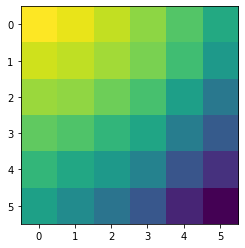

In [106]:
plt.imshow(rastor)